In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [66]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [196]:
df=pd.read_csv('movies.csv')

In [197]:
# Looking at the data
df.head(2)
df.tail(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [198]:
#Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [199]:
#column based null vales
for col in df.columns:
    missing=np.mean(df[col].isnull()).round(4)
    print('{} - {} %'.format(col,missing))

name - 0.0 %
rating - 0.01 %
genre - 0.0 %
year - 0.0 %
released - 0.0003 %
score - 0.0004 %
votes - 0.0004 %
director - 0.0 %
writer - 0.0004 %
star - 0.0001 %
country - 0.0004 %
budget - 0.2831 %
gross - 0.0246 %
company - 0.0022 %
runtime - 0.0005 %


In [200]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [201]:
# Replacing null values with object cols with mode,  numerics with median

In [202]:
def replace_null_values(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            mode_value =dataframe[column].mode()[0]
            dataframe[column].fillna(mode_value, inplace=True)
        else:
            median_value = np.nanmedian(dataframe[column])
            dataframe[column].fillna(median_value, inplace=True)
    return dataframe

In [203]:
replace_null_values(df)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,20205757.0,Universal Pictures,90.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000.0,20205757.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,20205757.0,Embi Productions,104.0
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000.0,20205757.0,Universal Pictures,120.0


In [204]:
for col in df.columns:
    missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [205]:
# Getting more knowledge of the data with statistical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7668.0,2.000405e+03,1.115351e+01,1980.0,1991.00,2000.0,2010.0,2.020000e+03
score,7668.0,6.390454e+00,9.686545e-01,1.9,5.80,6.5,7.1,9.300000e+00
votes,7668.0,8.808694e+04,1.632954e+05,7.0,9100.00,33000.0,93000.0,2.400000e+06
budget,7668.0,3.131756e+07,3.575273e+07,3000.0,14000000.00,20500000.0,32000000.0,3.560000e+08
gross,7668.0,7.706370e+07,1.639191e+08,309.0,4681150.75,20205757.0,72620218.5,2.847246e+09
runtime,7668.0,1.072599e+02,1.857655e+01,55.0,95.00,104.0,116.0,3.660000e+02


In [206]:
#We changed some columns to integers
df[['budget','votes','gross','runtime']]=df[['budget','votes','gross','runtime']].astype('int')

In [207]:
#fixing the released column into  as datetime and  as country columns
df['released']

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [208]:
df['datetime']=pd.to_datetime(df['released'].str.split(r"(", expand=True)[0])

In [209]:
df['released'].str.split('(').str[-1].str.rstrip(')')

0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
7663    United States
7664    United States
7665         Cameroon
7666    United States
7667    United States
Name: released, Length: 7668, dtype: object

In [210]:
df['ReleasedCountry']=df['released'].str.split('(').str[-1].str.rstrip(')')

In [211]:
df[df['datetime'].dt.year != df['year']]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,datetime,ReleasedCountry
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127,1981-06-19,United States
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.3,54000,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000,30031783,C.A.T. Films,109,1984-10-26,United States
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219,1981-04-24,United States
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000,534816,Cattle Annie Productions,97,1981-04-24,United States
40,The Watcher in the Woods,PG,Family,1980,"October 9, 1981 (United States)",6.3,5700,John Hough,Brian Clemens,Bette Davis,United States,20500000,5000000,Walt Disney Productions,84,1981-10-09,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000,193457467,"""Weathering With You"" Film Partners",112,2020-01-17,United States
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93,2020-06-26,United States
7584,"Faith, Hope & Love",PG,Comedy,2019,"February 4, 2020 (Australia)",6.2,719,J.J. Englert,Robert Krantz,Peta Murgatroyd,United States,20500000,210091,Ellinas Multimedia,106,2020-02-04,Australia
7604,Mine 9,Not Rated,Drama,2019,"May 19, 2020 (Poland)",6.4,4400,Eddie Mensore,Eddie Mensore,Terry Serpico,United States,350000,226421,Emphatic Films,83,2020-05-19,Poland


In [212]:
df['New_Year']=df['datetime'].dt.year

In [213]:
## Removing year column because its not match with our real datetime year values
df.drop(['year'],axis=1,inplace=True)

In [214]:
##Removing released column 
df.drop(['released'],axis=1,inplace=True)

In [215]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,datetime,ReleasedCountry,New_Year
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015-12-18,United States,2015
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018-04-27,United States,2018
7480,The Lion King,PG,Animation,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,2019-07-19,United States,2019
6653,Jurassic World,PG-13,Action,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124,2015-06-12,United States,2015
6043,The Avengers,PG-13,Action,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,2012-05-04,United States,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,Madadayo,R,Drama,7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134,1993-04-17,Japan,1993
3203,Trojan War,PG-13,Comedy,5.7,5800,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85,1997-10-01,Brazil,1997
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181,2019-04-26,United States,2019
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162,2009-12-18,United States,2009


In [216]:
a= df['name'].isin(['Avengers: Endgame', 'Avatar', 'Titanic'])

In [217]:
#last 3 rows with uncorrect gross values 
df.loc[a,'gross']=[2797000000,2923000000,1843000000]

In [218]:
#pd.set_option('display.max_rows',None) to see all rows

In [219]:
##Checking if any duplicates and removing if any

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2385, dtype: object

In [220]:
df.nunique()

name               7512
rating               12
genre                19
score                72
votes               936
director           2949
writer             4535
star               2814
country              59
budget              413
gross              7472
company            2385
runtime             138
datetime           2944
ReleasedCountry      61
New_Year             41
dtype: int64

In [221]:
df['company'].unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Dow Jazz Films', 'Embi Productions', 'PK 65 Films'], dtype=object)

In [222]:
df.duplicated().sum()

0

Checking meanings between Data Visualazations


GROSS PREDICTION

Text(0.5, 1.0, 'Budget vs Gross Earnings')

Text(0.5, 0, 'Gross Earnings')

Text(0, 0.5, 'Budget')

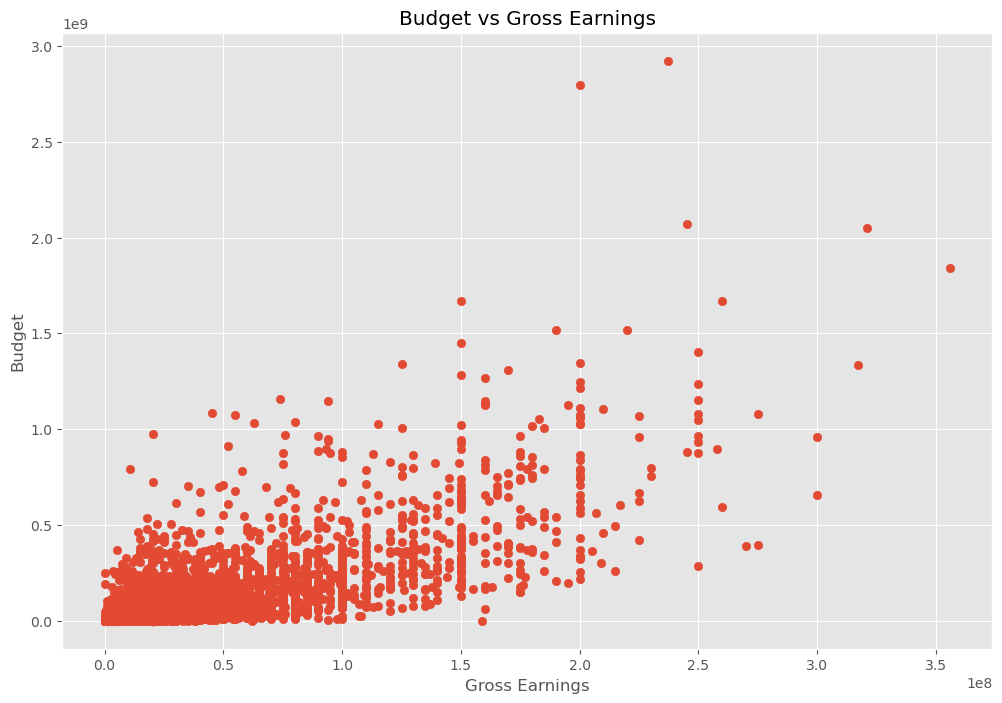

In [223]:
plt.scatter(df['budget'],df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')

In [224]:
df2=df.sort_values(by=['gross'],inplace=False,ascending=False)

<AxesSubplot:xlabel='budget', ylabel='gross'>

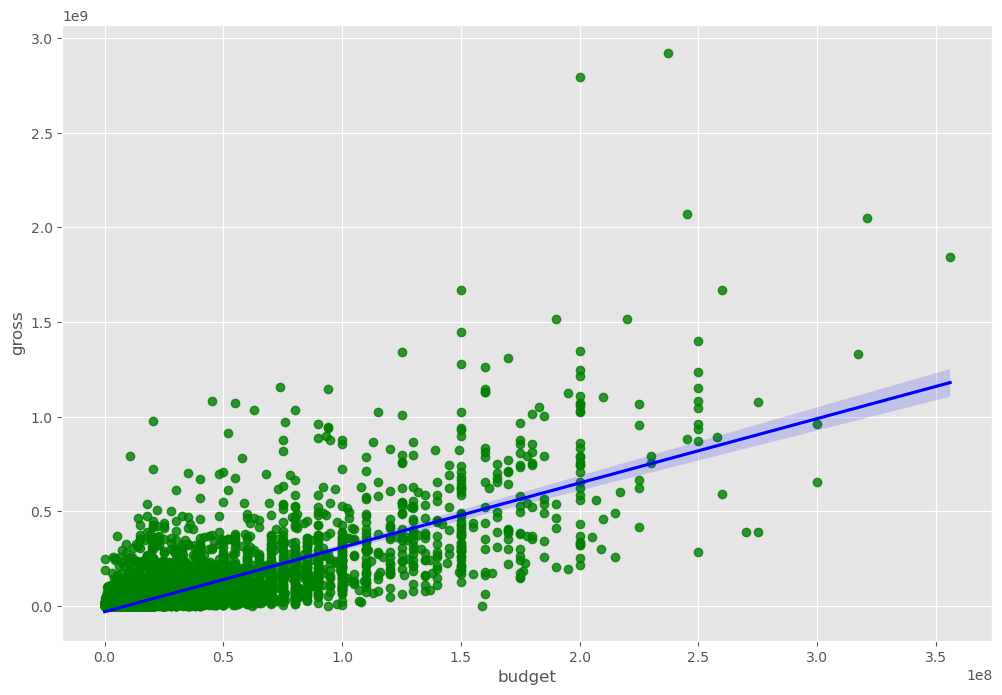

In [225]:
#plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df2,scatter_kws={'color':'green'},line_kws={'color':'blue'})

In [226]:
## Correlation between values 
#pearson(def),kendall,spearman corrs

df.corr(method='pearson')

C:\Users\최별희\AppData\Local\Temp\ipykernel_8928\3502040224.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,score,votes,budget,gross,runtime,New_Year
score,1.000000,0.409157,0.061931,0.185202,0.399407,0.106221
votes,0.409157,1.000000,0.460968,0.633135,0.309151,0.217995
budget,0.061931,0.460968,1.000000,0.743323,0.273371,0.284125
gross,0.185202,0.633135,0.743323,1.000000,0.244333,0.251996
runtime,0.399407,0.309151,0.273371,0.244333,1.000000,0.120573
New_Year,0.106221,0.217995,0.284125,0.251996,0.120573,1.000000


C:\Users\최별희\AppData\Local\Temp\ipykernel_8928\566177662.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2f',annot_kws={'size': 20})


<AxesSubplot:>

Text(0.5, 1.0, 'Correlation matrix for numeric features')

Text(0.5, 58.7222222222222, 'Movie Features')

Text(120.72222222222221, 0.5, 'Movie Features')

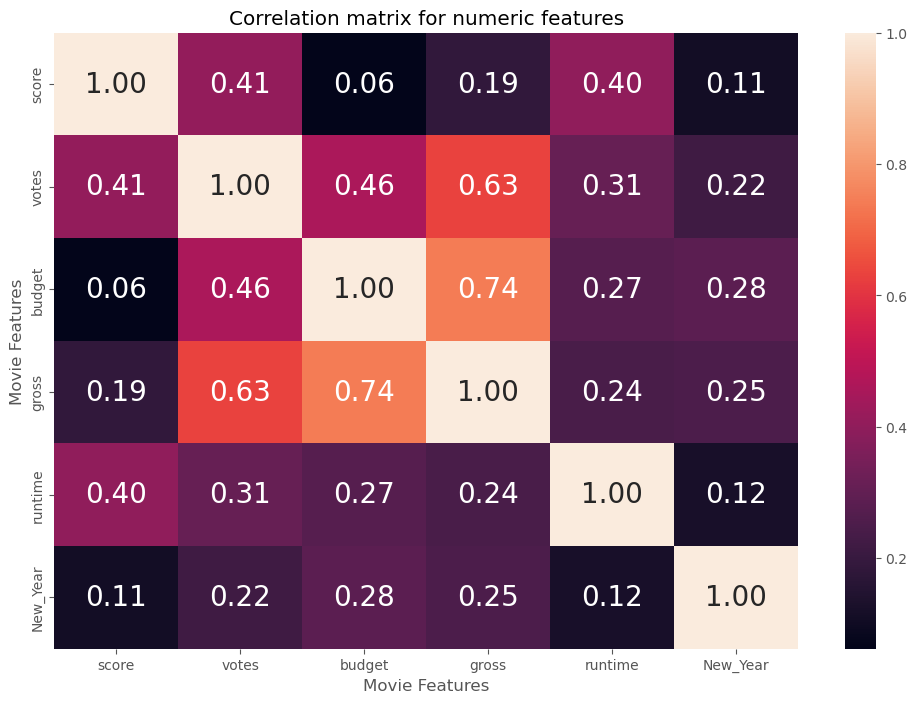

In [227]:
## Visulazation Correlation 

sns.heatmap(df.corr(),annot=True,fmt='.2f',annot_kws={'size': 20})
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')



In [228]:
## Converting Object columns into category so we can use adventages of category usage
for col in df.columns:
    if df[col].dtype == object:
        print(col)
        df[col] = df[col].astype('category')

name
rating
genre
director
writer
star
country
company
ReleasedCountry


In [256]:
## Converting all columns into numeric
for col in df.columns:
    if df2[col].dtype == object:
        print(col)
        df2[col] = df2[col].astype('category')
        df2[col] = df2[col].cat.codes

In [255]:
df2

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,datetime,ReleasedCountry,New_Year
5445,533,5,0,7.8,1100000,1155,1778,2334,55,237000000,2923000000,2253,162,2009-12-18,56,2009
3045,6896,5,6,7.8,1100000,1155,1778,1595,55,200000000,2797000000,2253,194,1997-12-19,56,1997
6663,5144,5,0,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,2015-12-18,56,2015
7244,536,5,0,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,2018-04-27,56,2018
7445,535,5,0,8.4,903000,162,743,2241,55,356000000,1843000000,1606,181,2019-04-26,56,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,6.5,5200,730,1123,2319,54,20500000,1400,477,103,2001-02-09,56,2001
7625,6720,6,4,5.7,320,2546,2565,1915,55,20500000,790,2308,104,2019-01-11,56,2019
7580,4664,3,5,5.2,735,1445,2203,2278,55,20500000,682,1992,93,2020-06-26,56,2020
2417,3406,6,6,7.3,5100,33,1718,2563,27,11900000,596,796,134,1993-04-17,28,1993


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             7668 non-null   category      
 1   rating           7668 non-null   category      
 2   genre            7668 non-null   category      
 3   score            7668 non-null   float64       
 4   votes            7668 non-null   int32         
 5   director         7668 non-null   category      
 6   writer           7668 non-null   category      
 7   star             7668 non-null   category      
 8   country          7668 non-null   category      
 9   budget           7668 non-null   int32         
 10  gross            7668 non-null   int64         
 11  company          7668 non-null   category      
 12  runtime          7668 non-null   int32         
 13  datetime         7668 non-null   datetime64[ns]
 14  ReleasedCountry  7668 non-null   categor

In [253]:
np.unique(df['rating'].values.codes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int8)

In [237]:
df.nunique()

name               7512
rating               12
genre                19
score                72
votes               936
director           2949
writer             4535
star               2814
country              59
budget              413
gross              7472
company            2385
runtime             138
datetime           2944
ReleasedCountry      61
New_Year             41
dtype: int64

C:\Users\최별희\AppData\Local\Temp\ipykernel_8928\1667886657.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True,fmt='.2f',annot_kws={'size': 10})


<AxesSubplot:>

Text(0.5, 1.0, 'Correlation matrix for numeric features')

Text(0.5, 58.7222222222222, 'Movie Features')

Text(120.72222222222221, 0.5, 'Movie Features')

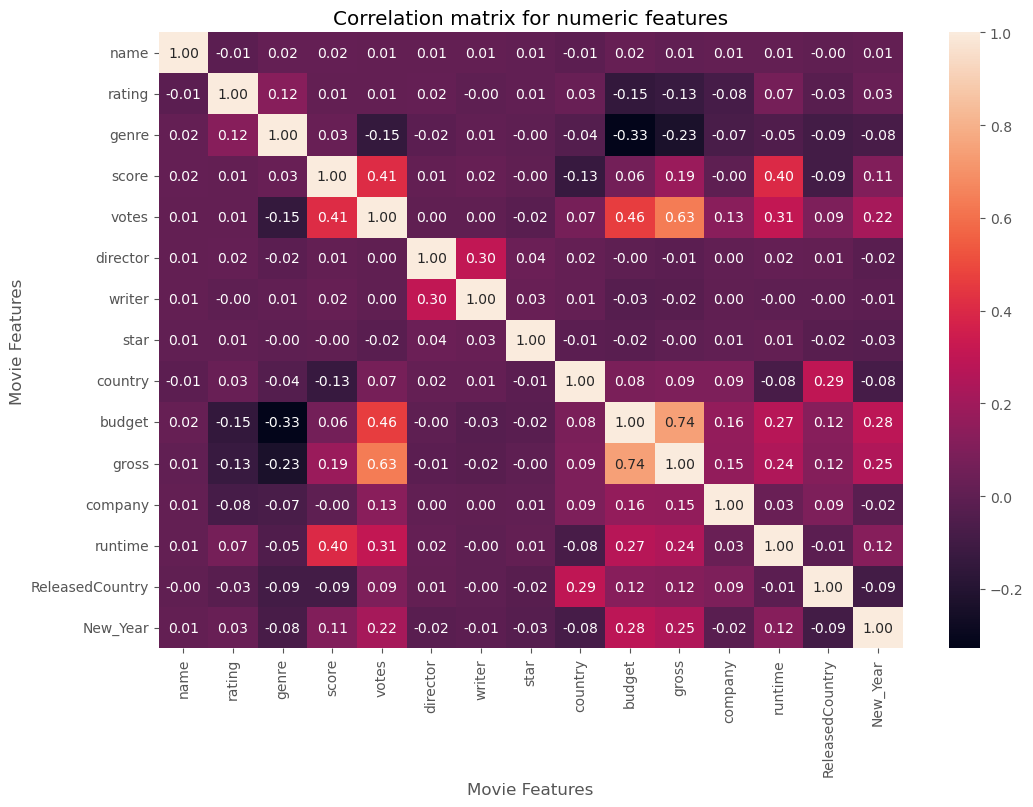

In [260]:
## Searching if theres a meaning between new numberic columns 
#Visulazation Correlation 

sns.heatmap(df2.corr(),annot=True,fmt='.2f',annot_kws={'size': 10})
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


In [272]:
sorted_val=df2.corr().unstack().sort_values() 

C:\Users\최별희\AppData\Local\Temp\ipykernel_8928\3319627461.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_val=df2.corr().unstack().sort_values()


In [278]:
sorted_val[(sorted_val) <1]

genre   budget   -0.328484
budget  genre    -0.328484
genre   gross    -0.232607
gross   genre    -0.232607
rating  budget   -0.148543
                    ...   
budget  votes     0.460968
votes   gross     0.633135
gross   votes     0.633135
budget  gross     0.743323
gross   budget    0.743323
Length: 210, dtype: float64

In [279]:
##final decision VOTES and BUDGET are the most highest impact on GROSS